In [61]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

In [26]:
par_img = cv2.imread('./cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')
hsv = cv2.cvtColor(par_img, cv2.COLOR_BGR2HSV)
cv2.imshow('image',hsv)
cv2.waitKey(0)
hsv.shape

(139, 160, 3)

In [14]:
para_dir = 'cell_images/Parasitized/'
unaff_dir = 'cell_images/Uninfected/'

In [16]:
PIMGS = os.listdir(para_dir)
NIMGS = os.listdir(unaff_dir)

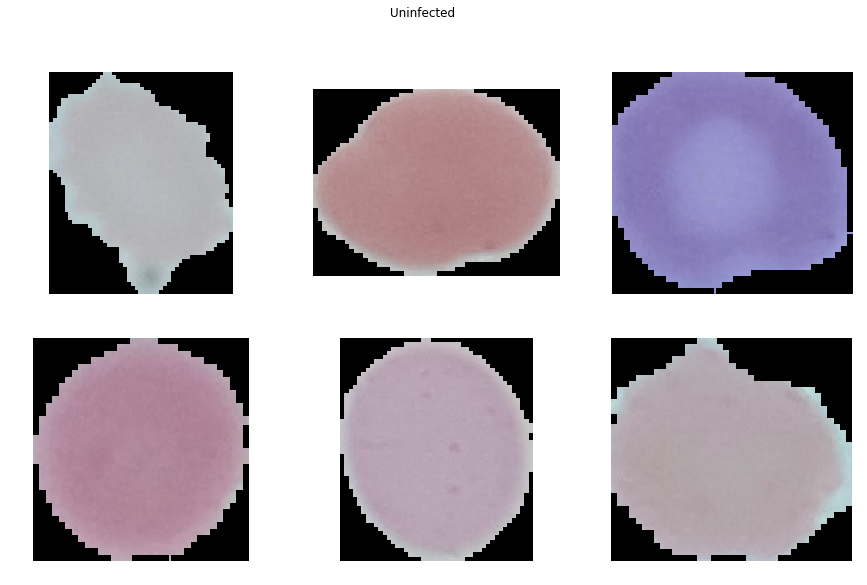

In [20]:
sample_normal = random.sample(NIMGS,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/Uninfected/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Uninfected')
plt.show()

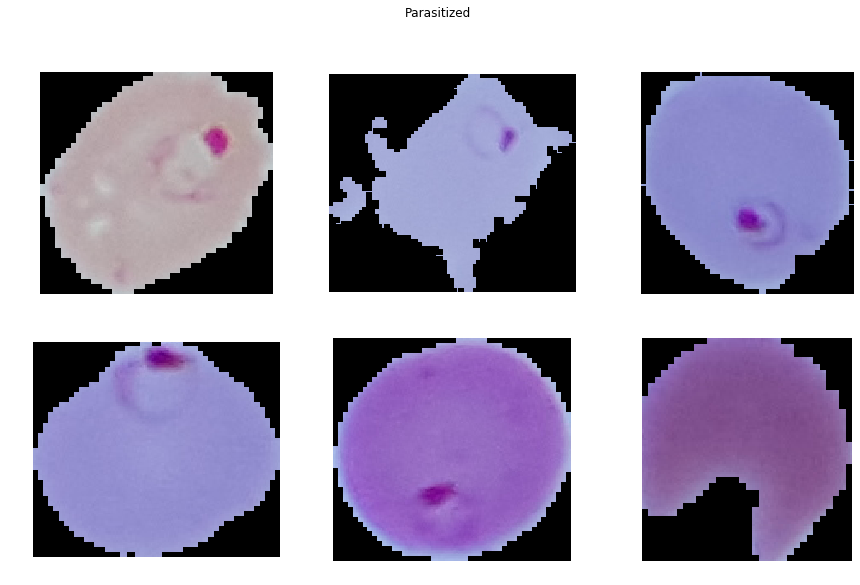

In [21]:
sample_normal = random.sample(PIMGS,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/Parasitized/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Parasitized')
plt.show()

In [31]:
data = []
labels = []
for file in os.listdir('./cell_images/Parasitized/'):
    try:
        image = cv2.imread('./cell_images/Parasitized/'+file)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((50,50))
        data.append(np.array(image))
        labels.append(0)
    except Exception as e:
        print("")

for file in os.listdir('./cell_images/Uninfected/'):
    try:
        image = cv2.imread('./cell_images/Uninfected/'+file)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((50,50))
        data.append(np.array(image))
        labels.append(1)
    except Exception as e:
        print("")

In [39]:
Cells = np.array(data)
labels = np.array(labels)

In [41]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [42]:
num_classes = len(np.unique(labels))
len_data = len(Cells)
num_classes

2

In [43]:
(x_train, x_test) = Cells[(int)(0.15*len_data):], Cells[:(int)(0.15*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [44]:
(y_train,y_test)=labels[(int)(0.15*len_data):],labels[:(int)(0.15*len_data)]

In [62]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [54]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=2,activation='relu',padding='same', input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=2,activation='relu' ,padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=2,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 128)       1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)       

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('model1.hdf5', monitor='val_loss', save_best_only=True)]

In [63]:
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Train on 23425 samples, validate on 4133 samples
Epoch 1/20
23425/23425 [==============================] - 184s 8ms/step - loss: 0.4553 - accuracy: 0.7629 - val_loss: 0.2095 - val_accuracy: 0.9364
Epoch 2/20
23425/23425 [==============================] - 212s 9ms/step - loss: 0.2109 - accuracy: 0.9285 - val_loss: 0.1919 - val_accuracy: 0.9444
Epoch 3/20
23425/23425 [==============================] - 227s 10ms/step - loss: 0.1928 - accuracy: 0.9407 - val_loss: 0.1822 - val_accuracy: 0.9444
Epoch 4/20
23425/23425 [==============================] - 230s 10ms/step - loss: 0.1828 - accuracy: 0.9470 - val_loss: 0.1664 - val_accuracy: 0.9545
Epoch 5/20
23425/23425 [==============================] - 228s 10ms/step - loss: 0.1719 - accuracy: 0.9489 - val_loss: 0.1621 - val_accuracy: 0.9519
Epoch 6/20
23425/23425 [==============================] - 200s 9ms/step - loss: 0.1687 - accuracy: 0.9505 - val_loss: 0.1651 - val_accuracy: 0.9543
Epoch 7/20
23425/23425 [==============================] - 23

In [80]:
from keras.models import load_model
model = load_model('./model1.hdf5')

In [85]:
[score,acc]=model.evaluate(x_test,y_test)

4133/4133 [==============================] - 7s 2ms/step


In [86]:
acc

0.9489474892616272

In [89]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
# pred

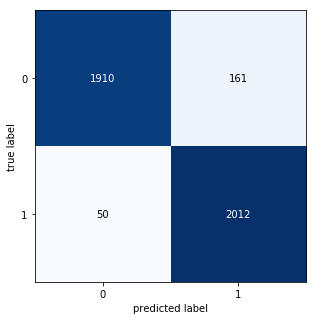

In [92]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

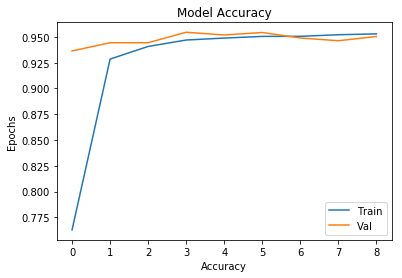

In [95]:
plt.plot(h.history['accuracy'])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [97]:
from sklearn.metrics import classification_report
print('{}'.format( 
                           classification_report(y_true , pred)))


              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2071
           1       0.93      0.98      0.95      2062

    accuracy                           0.95      4133
   macro avg       0.95      0.95      0.95      4133
weighted avg       0.95      0.95      0.95      4133

